# **[LEPL1109] - STATISTICS AND DATA SCIENCES**
## **Hackaton 02 - Classification: Diabetes Health indicators**
\
Prof. D. Hainaut\
Prod. L. Jacques\
\
\
Adrien Banse (adrien.banse@uclouvain.be)\
Jana Jovcheva (jana.jovcheva@uclouvain.be)\
François Lessage (francois.lessage@uclouvain.be)\
Sofiane Tanji (sofiane.tanji@uclouvain.be)

![alt text](figures/diab_illustration.jpg)

<div class="alert alert-danger">
<b>[IMPORTANT] Read all the documentation</b>  <br>
    Make sure that you read the whole notebook, <b>and</b> the <code>README.md</code> file in the folder.
</div>

# **Guidelines and Deliverables**

*   This hackaton is due on the **29 November 2024 at 23h59**
*   Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups, ChatGPT...) must be clearly indicated!</b>
*  This notebook (with the "ipynb" extension) file, the Python source file (".py"), the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
* Only the PDF report and the python source file will be graded, both on their content and the quality of the text / figures.
  * 4/10 for the code.
  * 4/10 for the Latex report.
  * 2/10 for the vizualisation. <br><br>

<div class="alert alert-info">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> a Python file with your classifier implementation. Please follow the template that is provided and ensure it passes the so-called <i>sanity</i> tests;
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>

As mentioned above, plagiarism is forbidden. However, we cannot forbid you to use artificial intelligence BUT we remind you that the aim of this project is to learn classification on your own and with the help of the course material. Finally, we remind you that for the same question, artificial intelligence presents similar solutions, which could be perceived as a form of plagiarism.

# **Context & Objective**
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.\
Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

You work in the diabetology department at **Saint Luc University Hospital**. The head of the department has asked you to find a solution for classifying and predicting **whether patients are at high risk of developing diabetes**. This will enable them to schedule an appointment with these patients to set up prevention tools. To do this, you have a database of patients who have passed through the department in recent years. In addition, the head of the department feels that the poll is too long, and would like to **reduce the number of questions while maintaining the reliability and quality of the results**.\
Your aim is to determine which characteristics are relevant and enable reliable patient classification. Be careful, don’t let a potential diabetic patient slip through the cracks. The rest of this document will guide you in this process.

## **Dataset description**

 
The data set is a real-world data set based on a survey (BRFSS) conducted by the Centers for Disease Control and Prevention in the USA some ten years ago.\
The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone health survey conducted by the Centers for Disease Control and Prevention. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic diseases and use of preventive services. The survey has been conducted annually since 1984. It contains 22 headings and around 70,000 entries.


<img src="figures/Features_table.png" alt="drawing" width="800"/>

## **Notebook structure**

* PART 1 - Preliminaries
   - 1.1 - Importing the packages
   - 1.2 - Importing the dataset
   - 1.3 - Is the dataset balanced?
   - 1.4 - Scale the dataset
    <br><br>
* PART 2 - Correlation
   - 2.1 - Correlation matrix 
   - 2.2 -Analyze the correlation with diabetes
   - 2.3 - Model selection and parameters tuning
   - 2.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 3 - Classifiers
   - 3.1 - Linear regressor
   - 3.2 - Logisitic regressor
   - 3.3 - KNN regressor
   <br><br>
* PART 4 - Validation metrics
   - 4.1 - Precision score
   - 4.2 - Recall score
   - 4.3 - F1 score
   <br><br>
* PART 5 - Reduce the questionnaire size
   - 5.1 - K-Fold preparation
   - 5.2 - Find the right combination length/regressor
   - 5.3 - Visualize the scores
   <br><br>   
* PART 6 - Visualization
   - 6.1 - Visualize your results

We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings. <b>Take advantage of this aspect to divide the work between all team members!</b> <br><br>
Remember that many libraries exist in Python, so many functions have already been developed. Read the documentation and don't reinvent the wheel! You can import whatever you want.


<br><font size=7 color=#009999> <b>PART I - Preliminaries</b> </font> <br><br>

In this part of the hackathon, we will import the necessary packages, then we will import the dataset, scale it and analyze its distribution.

In [20]:
"""
CELL N°1.1 : IMPORTING ALL THE NECESSARY PACKAGES

@pre:  /
@post: The necessary packages should be loaded.
"""

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')
# Import all the necessary packages here...

In [21]:
"""
CELL N°1.2 : IMPORTING THE DATASET

@pre:  /
@post: The object `df` should contain a Pandas DataFrame corresponding to the file `diabetes_dataset.csv`
"""

df = pd.read_csv("diabetes_dataset.csv")

df.info()
df.describe()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diabetes       70692 non-null  float64
 1   HighBP         70692 non-null  float64
 2   HighChol       70692 non-null  float64
 3   CholCheck      70692 non-null  float64
 4   BMI            70692 non-null  float64
 5   Smoker         70692 non-null  float64
 6   Stroke         70692 non-null  float64
 7   HeartDisease   70692 non-null  float64
 8   PhysActivity   70692 non-null  float64
 9   Fruits         70692 non-null  float64
 10  Veggies        70692 non-null  float64
 11  Alcohol        70692 non-null  float64
 12  AnyHealthcare  70692 non-null  float64
 13  NoDocbcCost    70692 non-null  float64
 14  GenHlth        70692 non-null  float64
 15  MentHlth       70692 non-null  float64
 16  PhysHlth       70692 non-null  float64
 17  DiffWalk       70692 non-null  float64
 18  Sex   

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


***Is the dataset balanced?***

It's good practice to check this to better understand the contents of our dataset. The balance between the different classes has an impact on the binarization threshold (which is initialized here at 0.5). Other things can also have an impact on the choice of threshold.

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64
(70692, 22)


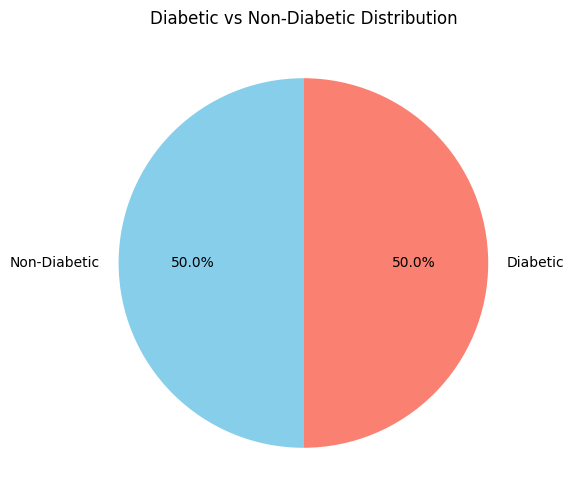

In [22]:
import matplotlib.pyplot as plt

"""
CELL N°1.3 : IS THE DATASET BALANCED?

@pre:  `df` contains the dataset
@post: Plot the diabetic/non-diabetic distribution in a pie chart
"""


# Vérification de l'équilibre du dataset en fonction de la variable cible 'Diabetes'
# Comptage des valeurs pour chaque classe
diabetes_distribution = df['Diabetes'].value_counts()

print(diabetes_distribution)
print(df.shape)

labels = ['Non-Diabetic', 'Diabetic']
plt.figure(figsize=(8, 6))
plt.pie(diabetes_distribution, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Diabetic vs Non-Diabetic Distribution')
plt.show()



***Standardize*** is important when you work with data because it allows data to be compared with one another. 

$z$ is the standard score of a population $x$. It can be computed as follows:
$$z = \frac{x-\mu}{\sigma}$$
with $\mu$ the mean of the population and $\sigma$ the standard deviation of the poplutation.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Standard_score) for further information about the standardization.\
Be careful to use the same formula as us, check in `scikit-learn`


In [23]:
from sklearn import preprocessing
"""
CELL N°1.4 : SCALE THE DATASET

@pre:  A pandas.DataFrame `df` containing the dataset
@post: A pandas.DataFrame `df` containing the standardized dataset (except classification columns (Diabetes))

"""

def scale_dataset(df): 
    scaler = preprocessing.StandardScaler()
    y = df['Diabetes']
    data_to_standardize = df.drop(columns = ['Diabetes'], axis =1)
    data_S = scaler.fit_transform(data_to_standardize)

    standardized_df = pd.DataFrame(data_S, columns=data_to_standardize.columns)
    
    # Réintégrer la colonne Diabetes
    standardized_df.insert(0, 'Diabetes', y.values)
    return standardized_df

df = scale_dataset(df)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diabetes       70692 non-null  float64
 1   HighBP         70692 non-null  float64
 2   HighChol       70692 non-null  float64
 3   CholCheck      70692 non-null  float64
 4   BMI            70692 non-null  float64
 5   Smoker         70692 non-null  float64
 6   Stroke         70692 non-null  float64
 7   HeartDisease   70692 non-null  float64
 8   PhysActivity   70692 non-null  float64
 9   Fruits         70692 non-null  float64
 10  Veggies        70692 non-null  float64
 11  Alcohol        70692 non-null  float64
 12  AnyHealthcare  70692 non-null  float64
 13  NoDocbcCost    70692 non-null  float64
 14  GenHlth        70692 non-null  float64
 15  MentHlth       70692 non-null  float64
 16  PhysHlth       70692 non-null  float64
 17  DiffWalk       70692 non-null  float64
 18  Sex   

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,...,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04
mean,0.500000,1.286560e-17,-9.649197e-17,2.106741e-16,-7.719358e-17,-7.819870e-17,1.849429e-17,-3.377219e-17,1.447380e-17,8.523457e-17,...,-1.045330e-16,-1.567994e-17,2.508791e-16,3.216399e-18,-6.432798e-17,-2.573119e-17,1.141822e-16,2.959087e-16,-9.005917e-17,3.216399e-17
std,0.500004,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,0.000000,-1.136104e+00,-1.052798e+00,-6.278417e+00,-2.510153e+00,-9.517105e-01,-2.574735e-01,-4.164703e-01,-1.538638e+00,-1.255371e+00,...,-4.604591e+00,-3.219449e-01,-1.649743e+00,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,-2.659082e+00,-3.810178e+00,-2.159964e+00
25%,0.000000,-1.136104e+00,-1.052798e+00,1.592758e-01,-6.827454e-01,-9.517105e-01,-2.574735e-01,-4.164703e-01,-1.538638e+00,-1.255371e+00,...,2.171745e-01,-3.219449e-01,-7.517193e-01,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,-5.553930e-01,-8.949340e-01,-7.807678e-01
50%,0.500000,8.802011e-01,9.498498e-01,1.592758e-01,-1.204662e-01,-9.517105e-01,-2.574735e-01,-4.164703e-01,6.499253e-01,7.965770e-01,...,2.171745e-01,-3.219449e-01,1.463042e-01,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,1.458365e-01,7.681388e-02,1.386961e-01
75%,1.000000,8.802011e-01,9.498498e-01,1.592758e-01,4.418130e-01,1.050740e+00,-2.574735e-01,-4.164703e-01,6.499253e-01,7.965770e-01,...,2.171745e-01,-3.219449e-01,1.044328e+00,-2.148271e-01,1.884113e-02,1.719532e+00,1.090046e+00,8.470661e-01,1.048562e+00,1.058160e+00
max,1.000000,8.802011e-01,9.498498e-01,1.592758e-01,9.578850e+00,1.050740e+00,3.883895e+00,2.401131e+00,6.499253e-01,7.965770e-01,...,2.171745e-01,3.106121e+00,1.942351e+00,3.218410e+00,2.404008e+00,1.719532e+00,1.090046e+00,1.548296e+00,1.048562e+00,1.058160e+00


<br><font size=7 color=#009999> <b>PART II - Correlation</b> </font> <br><br>

***In order to keep*** the important features for our classification, we can compute and plot (see e.g. `seaborn.heatmap`) the correlation matrix. With these correlation coefficient, we can establish a feature selection strategy.\
Be sure to use the `pearson` correlation.


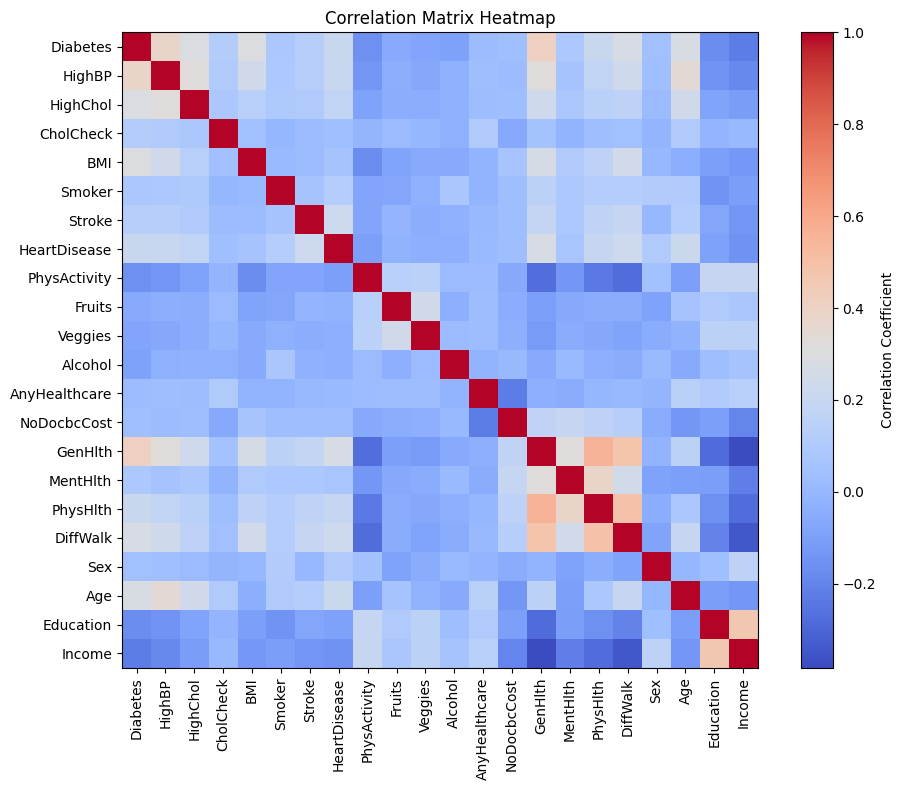

In [24]:
"""
CELL N°2.1 : CORRELATION MATRIX

@pre:  `df` contains the diabetes dataset
@post: `corr_matrix` is a Pandas DataFrame that contains the correlation matrix of the full dataset
"""

corr_matrix = df.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix Heatmap")

# Add labels
tick_labels = corr_matrix.columns
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.yticks(range(len(tick_labels)), tick_labels)



plt.tight_layout()
plt.show()

After this visualization, it is time to sort the coefficients of correlation to keep them with the best correlation with `Diabetes`. **Be careful** with the sign.

In [25]:
"""
CELL N°2.2 : ANALYZE THE CORRELATION WITH DIABETE

@pre:  `corr_matrix` is a Pandas DataFrame that contains the correlation matrix of the training set
@post: `sorted_features` contains a list of features (columns of `df`) 
       sorted according to their correlation with `Diabetes` 
"""

def sort_features(corr_matrix):
    # To modify
    return corr_matrix['Diabetes'].abs().sort_values(ascending=False)

sorted_features = sort_features(corr_matrix).index.tolist()[1:]


#(from TP1)
def feature_selection_corr(dataFrame, n):
    out = dataFrame.corrwith(dataFrame['Diabetes']).abs().sort_values(ascending=False).head(n)
    return out

#orted_features = feature_selection_corr(df, 15)
print("top 10 most correlated features : ")
print(sorted_features)


top 10 most correlated features : 
['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDisease', 'Education', 'PhysActivity', 'Stroke', 'CholCheck', 'Alcohol', 'MentHlth', 'Smoker', 'Veggies', 'Fruits', 'Sex', 'NoDocbcCost', 'AnyHealthcare']


<br><font size=7 color=#009999> <b>PART III - Classifiers</b> </font> <br><br>

In this third part, you need to write functions that return a lamba function with a classifier for the test set. **Be careful** to keep the same form as the one suggested to pass the sanity checks.

**Implement** the *linear_regressor*. Please follow the specifications in the provided template.

**Reminder:** Linear regressor is a model that predicts a continuous value by fitting a line (or hyperplane) to the data, minimizing the difference between observed and predicted values.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) for further information about the classifier.

In [26]:
"""
CELL N°3.1 : LINEAR REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post: Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""

from sklearn.linear_model import LinearRegression

def linear_regressor(X_train, y_train, threshold = 0.5):
    # To modify

    lin_regressor = LinearRegression()
    lin_regressor.fit(X_train, y_train)

    return lambda X_test : (lin_regressor.predict(X_test) >= threshold).astype(int)

**Implement** the *logistic_regressor*. Please follow the specifications in the provided template.

**Reminder:** Logisitic regressor is a classification model that estimates the probability of an observation belonging to a class using a logistic function; suitable for binary (and multiclass) problems.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) for further information about the classifier.

In [27]:
"""
CELL N°3.2 : LOGISTIC REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post:  Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""
from sklearn.linear_model import LogisticRegression

def logistic_regressor(X_train, y_train, threshold = 0.5):
    log_regressor = LogisticRegression()
    log_regressor.fit(X_train, y_train)

    return lambda X_test: (log_regressor.predict_proba(X_test)[:, 1] >= threshold).astype(int)

**Implement** the *knn_regressor*. Please follow the specifications in the provided template.  <br>

**Reminder:** Knn regressor is a non-parametric classification algorithm that classifies an observation according to the classes of its k nearest neighbors in feature space.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) for further information about the classifier.\
Attention, you must implement it with **Euclidian distance** and **10** neighbors.

In [28]:
"""
CELL N°3.3 : KNN REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post: Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""

from sklearn.neighbors import KNeighborsRegressor

def knn_regressor(X_train, y_train, threshold = 0.5, n_neighbors = 10):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    return lambda X_test : (knn.predict(X_test) >= threshold).astype(int)

<br><font size=7 color=#009999> <b>PART IV - Validation metrics</b> </font> <br><br>

In this part, we will implement tools that will help us to **validate** the prediction models implemented in Part III. In particular, we will use the _precision, recall_ and _F1 score_ metrics. 

**Implement** the _precision, recall_ and _F1 score_. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance metric allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the three metrics.

In [29]:
from sklearn.metrics import precision_score, recall_score

"""
CELL N°4.1 : PRECISION SCORE

@pre:  /
@post: `precision(y_test, y_pred)` returns the prediction metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""

def precision(y_test, y_pred):
    # To modify
    return precision_score(y_test, y_pred)

In [30]:

"""
CELL N°4.2 : RECALL SCORE

@pre:  /
@post: `recall(y_test, y_pred)` returns the recall metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""

def recall(y_test, y_pred):
    r_score = recall_score(y_test, y_pred)
    return r_score 

In [31]:
from sklearn.metrics import f1_score as F1
"""
CELL N°4.3 : F1 SCORE

@pre:  /
@post: `f1_score(y_test, y_pred)` returns the F1 score metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""

def f1_score(y_test, y_pred):
    
    return F1(y_test, y_pred)

<br><font size=7 color=#009999> <b>PART V - Reduce the questionnaire size</b> </font> <br><br>

In this part, find a model that satisfies the following specifications: 
- A recall of at least 95%
- A F1 score of at least 75%

For that, we will use **k-fold** cross validation (see [the Wikipedia page](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) for a reminder), and then test the three models above with 
- Different number of features
- Different thresholds

In order to use k-fold cross validation, use the class `sklearn.model_selection.KFold` from the `scikit-learn` library (see [the documentation](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html)) with `n_splits = 3`.

<div class="alert alert-danger">
<b>[IMPORTANT] Grading</b>  <br>
In order for us to be able to automatically grade your submission, put <code>shuffle=True</code>, and <code>random_state=1109</code> when you initialize <code>KFold</code>.
</div>

In [32]:
from sklearn.model_selection import KFold

"""
CELL N°5.1 : K-FOLD PREPARATION

@pre:  `df` contains the scaled dataset.
@post: The following specifications should be satisfied: 
            - `kf` should contain a `KFold` object with 3 splits, shuffled and with 1109 seed. 
            - `X` should contain a pd.DataFrame with all the features (all columns except `Diabetes`)
            - `y` should contain a pd.DataFrame with all the labels (only the column `Diabetes`)
"""

kf = KFold(n_splits=3, shuffle=True, random_state=1109) 
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

In order to find our model, proceed as follows: 
- Fix a threshold in $(0, 1)$
- Define a dictionary `result` of the form 

<code>result = {
    "linear": {}, 
    "logistic": {}, 
    "knn": {}
}
</code>

- For $ i \in \{1, \dots, \texttt{N\_features}\} $: 
    - Select the $i$ **most correlated features** (use `sorted_features` defined above)
    - For all the pairs $((X_{\text{train}}, y_{\text{train}}), (X_{\text{test}}, y_{\text{test}}))$ given by k-fold
        - Compute the linear, logistic and KNN regressors with the fixed threshold on $X_{\text{train}}$
        - Compute the 3 different 3-tuple `validation(regressor, X_test, y_test)`
    - In `result[reg][i]`, save the **average** of all the validation tuples you computed for `reg`

In [ ]:
"""
CELL N°5.2 : FIND THE RIGHT COMBINATION LENGTH/REGRESSOR

@pre:  `kf`, `X` and `y` are defined such as in the @post of CELL 5.1. 
@post: `result` is such that `result[reg][i]` contains the average of the validations for regressor `reg`, 
       when keeping the `i` most correlated features
"""

def validation(regressor, X_test, y_test):
    # Nothing to do here!
    y_pred = regressor(X_test)
    return (recall(y_test, y_pred), precision(y_test, y_pred), f1_score(y_test, y_pred))




def find_best_model(kf, X, y, sorted_features, threshold): 
    
    y_bin = (y >= threshold).astype(int)
    
    X_arr = np.array(X)
    y_arr = np.array(y_bin)
    
    result = {
        "linear": {},
        "logistic": {},
        "knn": {}
    }

    for i in range(1, len(sorted_features) + 1):
        # Select the i most correlated features
        selected_features = sorted_features[:i]
        feature_indices = [X.columns.get_loc(col) for col in selected_features]

        linear_metrics = []
        logistic_metrics = []
        knn_metrics = []

        #from TP2
        for train_index, val_index in kf.split(X):
            X_train, X_val = X_arr[train_index, :][:, feature_indices], X_arr[val_index, :][:, feature_indices]
            y_train, y_val = y_arr[train_index].ravel(), y_arr[val_index].ravel()

            #Linear Regressor 
            lin_model = linear_regressor(X_train, y_train, threshold)
            linear_metrics.append(validation(lin_model, X_val, y_val))

            #Logistic Regressor
            log_model = logistic_regressor(X_train, y_train, threshold)
            logistic_metrics.append(validation(log_model, X_val, y_val))

            #KNN Regressor
            knn_model = knn_regressor(X_train, y_train, threshold)
            knn_metrics.append(validation(knn_model, X_val, y_val))
        

       
        result["linear"][i] = tuple(float(np.mean(metric)) for metric in zip(*linear_metrics))
        result["logistic"][i] = tuple(float(np.mean(metric)) for metric in zip(*logistic_metrics))
        result["knn"][i] = tuple(float(np.mean(metric)) for metric in zip(*knn_metrics))

    return result 



# To modify
threshold = 0.25


In [34]:
result = find_best_model(kf, X, y, sorted_features, threshold)
print(result)



{'linear': {1: (0.9677434015872945, 0.5480814434475271, 0.6998186059073385), 2: (0.988427308042283, 0.5415301983904506, 0.6997080997985229), 3: (0.9744495358786988, 0.5727958600719484, 0.7214880502591138), 4: (0.973147912662129, 0.5800980452443243, 0.7268894563869863), 5: (0.9797694569480638, 0.5851869451839684, 0.7327327956312776), 6: (0.9797395154680341, 0.585367139727703, 0.7328661372714924), 7: (0.9797126560709962, 0.5861834029091019, 0.7334975148368535), 8: (0.9794298175050834, 0.5864308069061004, 0.7336118881364388), 9: (0.9795719419036892, 0.5866846439709746, 0.7338502189936934), 10: (0.9796008882472563, 0.586463253567057, 0.7336852825209347), 11: (0.9796004702843332, 0.5864531520198905, 0.7336773902638352), 12: (0.9796005669579376, 0.5865326664954734, 0.7337396263943643), 13: (0.9806190615877818, 0.5868244181104759, 0.7342534755967725), 14: (0.9807604467341454, 0.5871380019423588, 0.7345385620234373), 15: (0.9809313582657024, 0.587180372504761, 0.7346196028161853), 16: (0.98098

In [35]:
print(result['linear'][1])

print(X.shape)

(0.9677434015872945, 0.5480814434475271, 0.6998186059073385)
(70692, 21)


The following cell allows you to test if the threshold that you chose satisfies the specifications, that are 
- A recall of at least 95%
- A F1 score of at least 75%

Plot these graphs for different threshold, and select the model **with the smallest number of questions** that satisfy the conditions above.

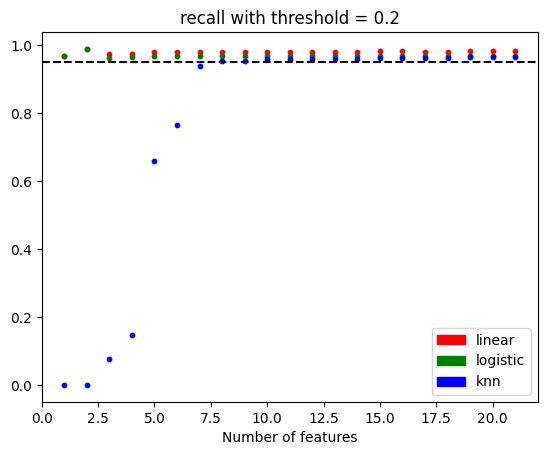

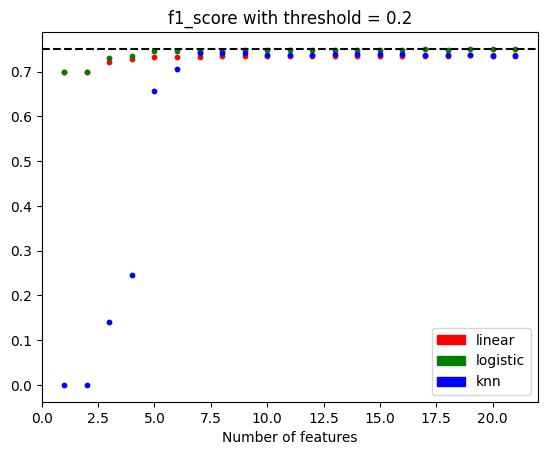

In [36]:
"""
CELL N°5.3 : VISUALIZE THE SCORES

@pre:  `result` contains the average of the validations for regressor `reg`, when keeping the `i` most correlated features
@post: plot of the scores for each condition
"""

# Nothing to do here, just run me! 

from helper import plot_result
plot_result(result, threshold, to_show = "recall")
plot_result(result, threshold, to_show = "f1_score")

<br><font size=7 color=#009999> <b>PART VI - Visualization</b> </font> <br><br>


 In this part, you are asked to produce a **clear and clean figure** expressing a result
or giving an overall vision of your work for this hackaton. **Please feel free to do as you
wish. Be original!** 

The **clarity**, **content** and **description** (in the report) of your figure will be evaluated.

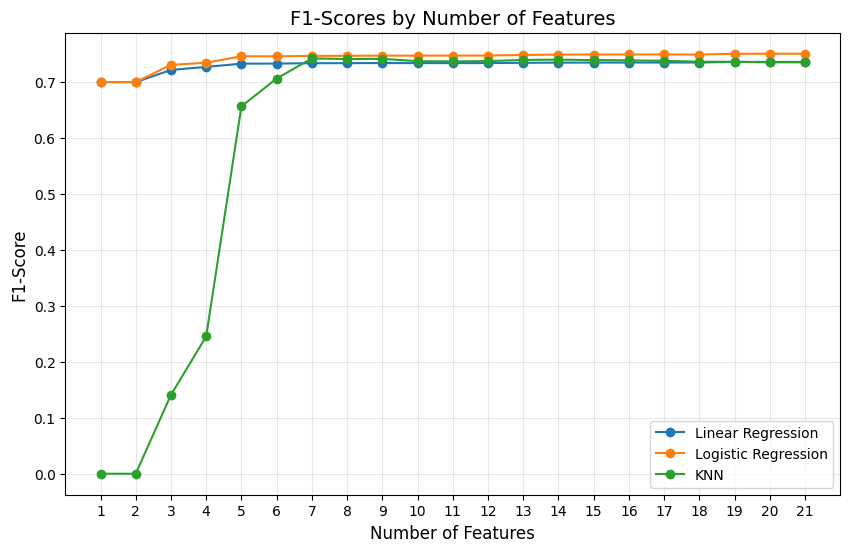

In [37]:
import matplotlib.pyplot as plt

# Structure du dictionnaire : {method: {num_features: (recall, precision, f1_score)}}


# Extraire les F1-scores
num_features = sorted(result["linear"].keys())  # Nombre de caractéristiques
linear_f1 = [result["linear"][i][2] for i in num_features]   # F1-score de Linear Regression
logistic_f1 = [result["logistic"][i][2] for i in num_features]  # F1-score de Logistic Regression
knn_f1 = [result["knn"][i][2] for i in num_features]  # F1-score de KNN

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(num_features, linear_f1, marker='o', label="Linear Regression")
plt.plot(num_features, logistic_f1, marker='o', label="Logistic Regression")
plt.plot(num_features, knn_f1, marker='o', label="KNN")

# Ajouter des labels, une légende et un titre
plt.title("F1-Scores by Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(num_features)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


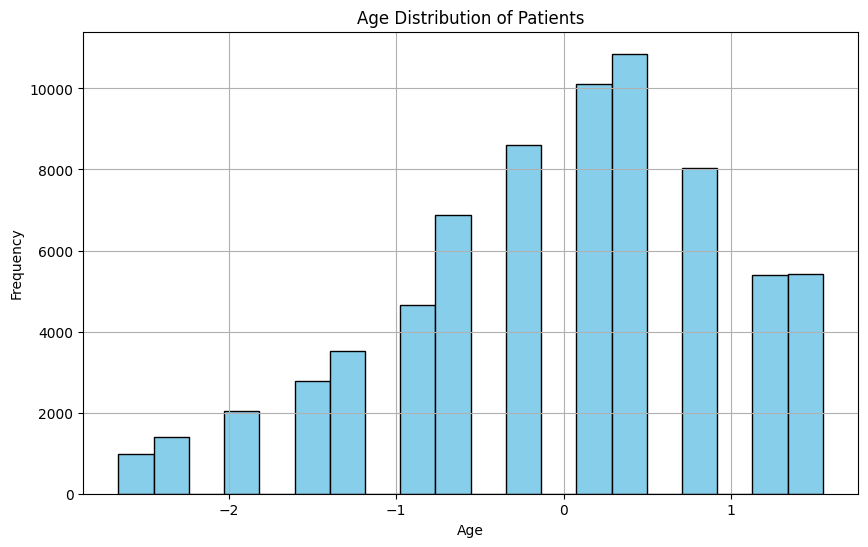

KeyError: 'Glucose'

<Figure size 1200x800 with 0 Axes>

In [38]:
"""
CELL N°6.1 : VISUALIZE YOUR RESULTS

@pre: /
@post: Visualize the distribution of ages in the dataset and the correlation between BMI and Glucose levels for diabetic and non-diabetic patients
"""
# Will work when the dataset is loaded!

import matplotlib.pyplot as plt

# Visualizing the distribution of ages in the dataset
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualizing the correlation between BMI and Glucose levels for diabetic and non-diabetic patients
plt.figure(figsize=(12, 8))

# Scatter plot for non-diabetic patients
plt.scatter(df[df['Diabetes'] == 0]['BMI'], df[df['Diabetes'] == 0]['Glucose'], 
            color='skyblue', label='Non-Diabetic', alpha=0.6, edgecolors='w', linewidth=0.5)

# Scatter plot for diabetic patients
plt.scatter(df[df['Diabetes'] == 1]['BMI'], df[df['Diabetes'] == 1]['Glucose'], 
            color='salmon', label='Diabetic', alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('BMI vs Glucose Levels')
plt.xlabel('BMI')
plt.ylabel('Glucose Levels')
plt.legend()
plt.grid(True)
plt.show()